In [11]:
from java.java8.JavaLexer import JavaLexer
from antlr4 import *

def count_java_tokens_antlr4(code):
    lexer = JavaLexer(InputStream(code))
    token_count = 0
    for token in lexer.getAllTokens():
        token_count += 1
    return token_count

In [9]:
def cr_and_num_token(dataset_url: str, compile_info_col: str):
    import pandas as pd
    import numpy as np
    df = pd.read_parquet(dataset_url, "fastparquet")
    df["len_func_body"] = df["func_body"].apply(lambda func: count_java_tokens_antlr4(func))
    print(df["len_func_body"].describe())
    from collections import defaultdict
    buckets = [(3, 10), (10, 33), (33, 50), (50, 102), (102, 200), (200, 400), (400, 800), (800, 1300)]
    stats = {}
    for _, row in df.iterrows():
        for bucket in buckets:
            if row["len_func_body"] >= bucket[0] and row["len_func_body"] < bucket[1]:
                tmp = stats.get(bucket, [0, 0])
                tmp[0] += 1
                if row[compile_info_col] == "<COMPILED_SUCCESSFULLY>":
                    tmp[1] += 1
                stats[bucket] = tmp
                break
    import matplotlib.pyplot as plt

    # Data
    intervals = [str(bucket) for bucket in buckets]
    compilables = [stats[bucket][1] for bucket in buckets]
    totals = [stats[bucket][0] for bucket in buckets]
    percentages = [stats[bucket][1] / stats[bucket][0] * 100 for bucket in buckets]
    # Plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()

    bar_width = 0.35
    x = np.arange(len(intervals))

    bars1 = ax1.bar(x - bar_width/2, compilables, bar_width, color='skyblue', label='#Compilable')
    bars2 = ax1.bar(x + bar_width/2, totals, bar_width, color='orange', label='#Func')
    # Add percentages above each column
    for bar, compilable in zip(bars1, compilables):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, compilable, ha='center')

    # Add values above each column in the additional column
    for bar, value in zip(bars2, totals):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, value, ha='center', color='black')
    
    ax2.plot(x, percentages, marker='o', color='blue', label='Percentage', linestyle='-')
    for i, percentage in enumerate(percentages):
        ax2.text(i, percentage, f'{percentage:.2f}%', ha='right', va='bottom')
        
    ax1.set_xlabel('Function Body Length')
    ax1.set_ylabel('Compilable / Num_Func')
    ax2.set_ylabel('Percentage')
    plt.title('Distribution')
    ax1.set_xticks(x, intervals, rotation=45, ha='right')
    ax1.legend(loc="center right")
    ax1.set_ylim(0, max(max(compilables), max(totals)) + 100)
    ax2.set_ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

line 2:67 token recognition error at: '";\n'
line 14:35 token recognition error at: ''''
line 14:37 token recognition error at: '')"'
line 24:31 token recognition error at: ''''
line 24:33 token recognition error at: '')"'
line 7:46 token recognition error at: '");\n'
line 2:36 token recognition error at: ''ab'
line 2:40 token recognition error at: ''")'
line 2:43 token recognition error at: '";\n'
line 19:23 token recognition error at: ''ab'
line 19:27 token recognition error at: ''""'
line 2:72 token recognition error at: ''''
line 2:74 token recognition error at: '' +'
line 2:100 token recognition error at: ''''
line 2:102 token recognition error at: ''\n'
line 3:44 token recognition error at: ''''
line 3:46 token recognition error at: '' +'
line 3:68 token recognition error at: ''''
line 3:70 token recognition error at: '' +'
line 2:95 token recognition error at: ''''
line 2:97 token recognition error at: '' +'
line 3:38 token recognition error at: ''''
line 3:40 token recognition 

count    3629.000000
mean       79.934417
std       118.195870
min         3.000000
25%        10.000000
50%        33.000000
75%       102.000000
max      1298.000000
Name: len_func_body, dtype: float64


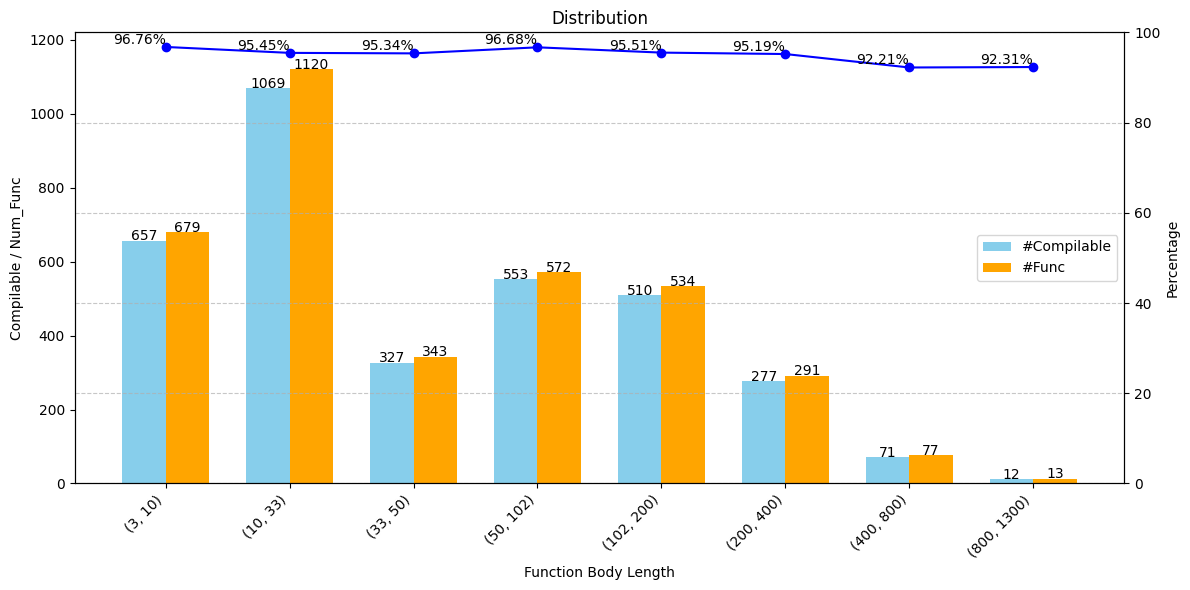

In [12]:
cr_and_num_token("/home/hieuvd/lvdthieu/CodeGen/java_data/data/compile_info_codellama_v1.parquet", "compile_info_filled_file_baseline_output")

In [6]:
def check_compilable_rate(dataset_url: str, compile_info_col: str="compile_info_filled_file_baseline_output") -> int:
    import pandas as pd
    df = pd.read_parquet(dataset_url, "fastparquet")
    return len(df[df[compile_info_col] == "<COMPILED_SUCCESSFULLY>"]) / len(df)

In [4]:
print(check_compilable_rate("/home/hieuvd/lvdthieu/CodeGen/java_data/data/compile_info_deepseek_v2.parquet", "compile_info_filled_file_finetune_output"))

0.9754753375585561


In [1]:
def jsonl2parquet(src: str, dst: str):
    import pandas as pd
    df = pd.read_json(src, lines=True)
    print(df.info())
    df.to_parquet(dst, "fastparquet")

In [8]:
def make_project_json(files_path: str):
    with open(files_path, "r") as f:
        files_path = f.read().split('\n')
    files_path = files_path[:-1]
    

In [9]:
make_project_json("/var/data/lvdthieu/files_path.txt")


'/var/data/lvdthieu/repos/maven_projects/AdoptOpenJDK_jitwatch/jitwatch/core/src/main/java/org/adoptopenjdk/jitwatch/chain/CompileChainWalker.java'
''


# Check extract variable and signature of multiple class

In [5]:
from src.extract_parent_context import extract_signature_and_var

java_code = """
public class Test {
    public static void main(String[] args) {
        int a = 10;
        int b = 20;
        int c = a + b;
    }
}

public class Test2 {
    public static void main(String[] args) {
        int a = 10;
        int b = 20;
        int c = a + b;
    }
}
"""

extract_signature_and_var(java_code)

'{"Test": ["void main(String[] args) {<BODY>}"], "Test2": ["void main(String[] args) {<BODY>}"]}'

In [3]:
import pandas as pd

df = pd.read_parquet("/var/data/lvdthieu/code-generation/java_data/data/data/new_checkpoint.parquet", "fastparquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   proj_name      6000 non-null   object
 1   relative_path  6000 non-null   object
 2   class_name     6000 non-null   object
 3   func_name      6000 non-null   object
 4   masked_class   6000 non-null   object
 5   func_body      6000 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


In [4]:
df.head()

,proj_name,relative_path,class_name,func_name,masked_class,func_body
0,,var/data/lvdthieu/code-generation/java_data/AJ...,ColumnTypePool,create,class ColumnTypePool implements FrameColumnTyp...,\n boolean isIndexed = indexBlockCa...
1,,var/data/lvdthieu/code-generation/java_data/pa...,Main,storeToJsonFile,class Main {\n private static ArrayList<Cla...,\n Gson gson = new GsonBuilder().setPre...
2,maven_projects,AdoptOpenJDK_jitwatch/jitwatch/core/src/main/j...,CompileChainWalker,processParseTag,class CompileChainWalker extends AbstractCompi...,\n\t\tString methodID = null;\n\t\tCompileNode...
3,maven_projects,AdoptOpenJDK_jitwatch/jitwatch/core/src/main/j...,CompileNode,addChild,class CompileNode\n{\t\n\tprivate boolean inli...,\n\t\tchild.parent = this;\n\t\tchildren.add(c...
4,maven_projects,AdoptOpenJDK_jitwatch/jitwatch/core/src/main/j...,AbstractCompilationVisitable,handleOther,class AbstractCompilationVisitable implements ...,\t\t\n\t\tif (!ignoreTags.contains(tag.getName...
